# MBTI Personality Quiz

In [1]:
# All info from this packet: https://d3jc3ahdjad7x7.cloudfront.net/spokaLTFBEADL9JnMd7njgJd96nyp7YNgICG2tlJWifcI7GP.pdf

In [129]:
import numpy as np
import pandas as pd

choices = np.array([-1,1])
user = np.random.choice(choices,size=70,p=[0.6,0.4])
friend = np.random.choice(choices,size=70,p=[0.3,0.7])
friend2 = np.random.choice(choices,size=70,p=[0.6,0.4])
friend3 = np.random.choice(choices,size=70,p=[0.7,0.3])

# user_pd = pd.Series(user)
# friend_pd = pd.Series(friend)

personality_pd = pd.DataFrame({'User':user,'FriendA':friend,'FriendB':friend2, 'FriendC':friend3},index=range(70))


In [130]:
personality_pd.head()

,User,FriendA,FriendB,FriendC
0,1,-1,-1,1
1,-1,-1,1,-1
2,-1,-1,-1,-1
3,-1,-1,-1,-1
4,-1,-1,-1,-1


In [131]:
personality_dict = dict()

for col in personality_pd.columns:
    quiz = personality_pd[col].values
    
    first = 0
    last = 64
    
    ei = sum([quiz[i] for i in range(first,last,7)])
    sn = sum([quiz[i] for i in range(first+1,last+1,7)]) + sum([quiz[i] for i in range(first+2,last+2,7)])
    tf = sum([quiz[i] for i in range(first+3,last+3,7)]) + sum([quiz[i] for i in range(first+4,last+4,7)])
    jp = sum([quiz[i] for i in range(first+5,last+5,7)]) + sum([quiz[i] for i in range(first+6,last+6,7)])
    
    
    personality_dict[col] = {'ei':ei,'sn':sn,'tf':tf,'jp':jp}
    

In [132]:
# EI is out of 10 questions
# SN is out of 20 questions
# TF is out of 20 questions
# JP is out of 20 questions

In [133]:
personality_dict

{'User': {'ei': -2, 'sn': -10, 'tf': -2, 'jp': 0},
 'FriendA': {'ei': 2, 'sn': -2, 'tf': 12, 'jp': 8},
 'FriendB': {'ei': 2, 'sn': 4, 'tf': -10, 'jp': -4},
 'FriendC': {'ei': -4, 'sn': -14, 'tf': -10, 'jp': -4}}

In [134]:
for i in personality_dict.keys():
    print(i)

User
FriendA
FriendB
FriendC


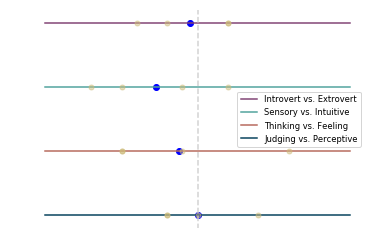

In [143]:
import matplotlib.pyplot as plt

ei = [personality_dict[i]['ei']*2 for i in personality_dict.keys()]
sn = [personality_dict[i]['sn'] for i in personality_dict.keys()]
tf = [personality_dict[i]['tf'] for i in personality_dict.keys()]
jp = [personality_dict[i]['jp'] for i in personality_dict.keys()]

line_lengths = [-20,20]
x_vals = np.zeros(len(ei))+1

plt.axis('off')

plt.plot(line_lengths,[4,4],label='Introvert vs. Extrovert',color='#814374')

plt.plot(line_lengths,[3,3],label='Sensory vs. Intuitive',color='#51A39D')

plt.plot(line_lengths,[2,2],label='Thinking vs. Feeling',color='#B7695C')

plt.plot(line_lengths,[1,1],label='Judging vs. Perceptive',color='#06425C')

plt.plot([0,0],[0,5],color='lightgrey',linestyle='--')

li = 4
for i in [ei,sn,tf,jp]:
    # alpha could be how valuable you hold their opinion, 
    plt.plot(i,x_vals*li,linestyle = 'None',marker='.', markersize=10,color='#CDBB79',alpha=0.5)
    plt.scatter([np.mean(i)],[li],color='blue')
    li-= 1
plt.ylim([0.8,4.2])
plt.legend(fontsize='small')
plt.show()